# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `целевой/нецелевой` в отдельном столбце (обратите внимание, что по проекту `Павелецкая сити` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `Записи звонков_павелецкая сити` лежат записи звонков по проекту `Павелецкая Сити`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `теги` в выгрузках `CSV` для определения статуса звонка `целевой/нецелевой`:

> a)	по проектам `Примавера` и `Павелецкая сити` наличие в столбце с тегами подстроки `Целевой_М108` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

> b)	по проекту `Хедлайнер` - наличие в столбце с тегами подстроки `первичный целевой` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `30 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/1oc0zK5p6LCR25M4Q2yJvKLAAkfvjHF8n?usp=sharing)

*   [Headliner_working_df.pkl](https://drive.google.com/file/d/1wjyvm-drKodUDjj-OS1zR-OBP5IHWQle/view?usp=drive_link) - обработанный ДФ с Headliner
*   [Primavera_working_df.pkl](https://drive.google.com/file/d/16vObFVXz_L_okxtEF59mAAMeT3bThFMK/view?usp=drive_link) - обработанный ДФ с Primavera
*   [Paveletskaya_city_working_df.pkl](https://drive.google.com/file/d/1boAU-vRUOLBSYNjKDgR_yxZ0_QZRHN6t/view?usp=drive_link) - обработанный ДФ с Paveletskaya_city
*   [result_df_num_classes.pkl](https://drive.google.com/file/d/1EcfmDKv5ZB8V7-y-864DrBN4fqCX7HCk/view?usp=drive_link)   [(csv)](https://drive.google.com/file/d/1VIUam7z_n_Vk3tROu_6E4lBLIbn4tjEC/view?usp=drive_link) - общий ДФ со всех ЖК с пронумерованными классами (1 - Целевой, 0 - Нецелевой)
*   [result_df.pkl](https://drive.google.com/file/d/15sYisy8NJhRgWXFguHGgqf9AgLideLh3/view?usp=drive_link)   [(csv)](https://drive.google.com/file/d/1fFjWytoGFrBX5OwoAZ2RwzzPrSMln3y6/view?usp=drive_link) - итоговый ДФ с траснкрибированными текстами
*   [result_work_df.pkl]() - итоговый ДФ с траснкрибированными текстами (выброшены пустые и несуществующие записи)

# Подготовка датафреймов

На примере одного из ноутбуков были обнаружены выбросы и нужно было почистить датафреймы от пустых значений.

В ДФ присутсвовали выбросы, во всех файлах они разные, поэтому было принято решение не выбрасывать их, а обработать и сохранить данные.

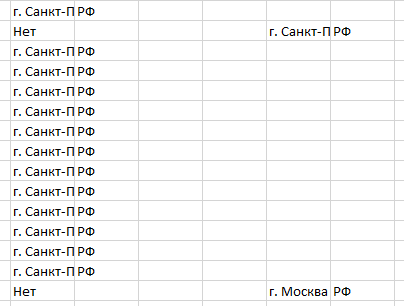

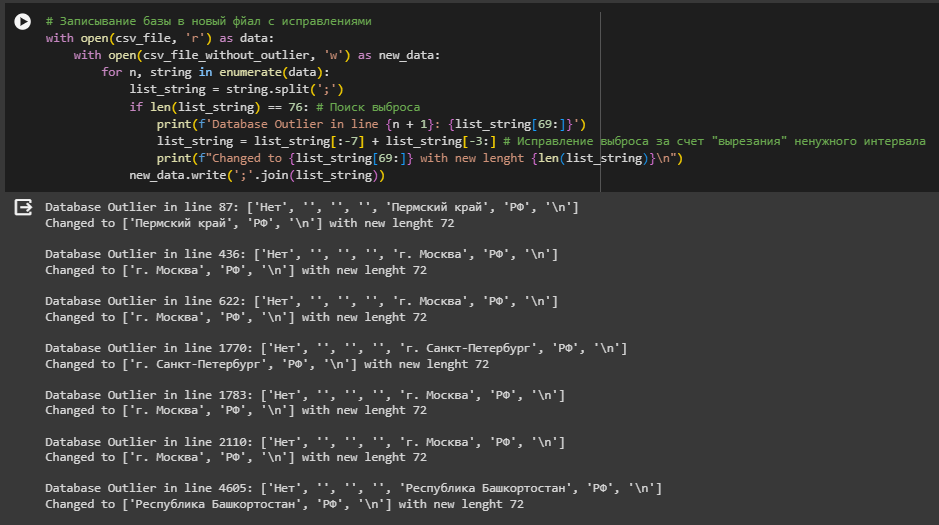

Ноутбук - [Headliner](https://colab.research.google.com/drive/1Da9B5YF7527mN81C-JvrtfVAWncZr6vv?usp=sharing)

# Создание нейронной сети на основе аудиоданных (Транскрибация)

Данное направление не увенчалось успехом. На обучающей выборке точность от 80-99%, но на тестовой выборке, что нейронная сеть не видела точность падает до 60%, что не приемлемо.

Для этой задачи использовался функционал библиотеки librosa. Параметризируя данные и объединяя в вектор получали данные для создания выборок.

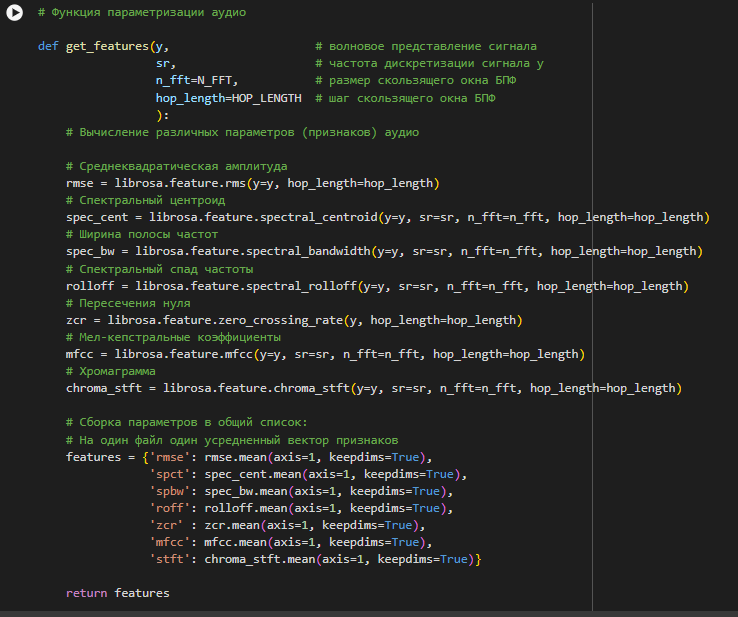

Дальше написав простую модель используя Dense-слои, Dropout и BatchNormalization, на обучающей выборке была достигнута точность свыше 95%, но на тестовой — 60-70%. Все последующие манипуляции не приводили к повышению точности, а лишь увеличению всей модели.

Поэтому данное направление оказалось безуспешным

Ноутбук - [Аудиосеть](https://colab.research.google.com/drive/1WyaXReEU8mvpdofiRr4MOq0HKBLSaE5-?usp=sharing)

# Создание нейронной сети на основе транскрибированных аудиоданных

Данное направление оказалось более перспективным и сложным.

Для начала необходимо было выбрать библиотеку, которая смогла бы транскрибировать аудио в текст.

Были выделены **Whisper**, **Vosk** и дополнительно мной **Speech_recognition**, **Nemo**.

## [Whisper](https://huggingface.co/docs/transformers/model_doc/whisper) VS [Vosk](https://proglib.io/p/reshaem-zadachu-perevoda-russkoy-rechi-v-tekst-s-pomoshchyu-python-i-biblioteki-vosk-2022-06-30)

Данные библиотеки показали себя неплохо. Траскрибировали текст и по ним можно было орпеделить класс.

**Whisper**:
*   Лучшее качество транскрибации
*   Транскрибация с пунктуацией
*   Возможность ускорения вычислений с GPU (для этого необходимы [CUDA](https://colab.research.google.com/drive/1Z2cahJ8pjN9BD0bptyPv4VlNzmDXY51p?usp=sharing) ядра видеокатры)
*   Транксрибация целого аудиофайла

**Vosk**:
*   Хорошее качество транскрибации
*   Для транскрибации с пунктуацией необходимо отдельно подлючать другую модель
*   Отсутствие возможности ускорения вычислений с GPU

Увидев визуально различия, было принято решения проверить смысловую схожесть текстов различными алгоритмами

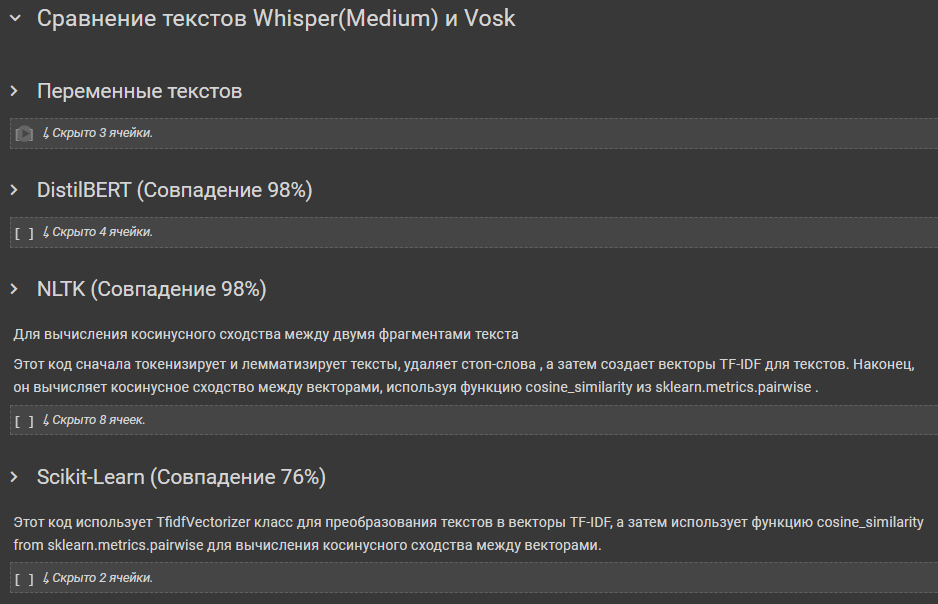

Хоть тексты смыслом не отличаются была выбрана библиотека ***Whisper*** за счет наличия пунктуации (без подключения дополнительных библиотек) и возможности ускорения с GPU

Ноутбук - [Vosk_VS_Whisper](https://colab.research.google.com/drive/11aG-uCrZ4N2Yg4Ou7dR_ff68kADZJQUx?usp=sharing)

## Speech_recognition, Nemo

Speech_recognition показала тоже неплохие результаты. Единственным ее недостатком было то, что необходимо делить аудиозапись на батчи по 40-50 секнуд, так как аудиозаписи больше 50 секунд она не транскрибировала.

In [ ]:
# Пример неполной транскрибации из-за размера аудиозаписи

# Создаем объект recognizer
recognizer = sr.Recognizer()

# Указываем путь к аудиофайлу
audio_file_path = "/content/test.wav"

# Открываем аудиофайл с помощью recognize_google() для распознавания речи
with sr.AudioFile(audio_file_path) as source:
    audio_data = recognizer.record(source) # записываем аудиофайл в переменную

# Используем recognize_google для распознавания текста
text = recognizer.recognize_google(audio_data, language="ru-RU")

# Выводим распознанный текст
print(text)

Результат: Здравствуйте Вы позвонили в группу компании кортрос благодарим вас за звонок пожалуйста дождитесь ответа оператора группа компаний курс Меня зовут Елена здравствуйте Здравствуйте Скажите пожалуйста

In [ ]:
# Разделение длинной аудиозаписи:
# Разделение аудиофайла на более короткие сегменты
from pydub.utils import make_chunks

text = ''
audio = AudioSegment.from_wav("/content/test.wav")
chunks = make_chunks(audio, 40000) # разделение на сегменты по 40 секунд
for i, chunk in enumerate(chunks):
    chunk_name = f"chunk_{i}.wav"
    chunk.export(chunk_name, format="wav")

for j in range(i + 1):
    try:
        with sr.AudioFile(f"chunk_{j}.wav") as source:
            audio_data = recognizer.record(source)
            text_i = recognizer.recognize_google(audio_data, language="ru-RU", pfilter=1)
            print(f"Chunk {j}:", text_i)
            text += text_i
    except sr.UnknownValueError:
        print(f"    $Ошибка чтения {chunk}: Не удалось распознать аудио$  ")
print()
print(text)

Результат:

Chunk 0: Здравствуйте Вы позвонили в группу компании кортрос благодарим вас за звонок пожалуйста дождитесь ответа оператора группа компаний курс Меня зовут Елена здравствуйте Здравствуйте Скажите пожалуйста в каком районе расположен в пресненском районе

Chunk 1: прямо рядом с метро шелепиха второй жилой комплекс - это I love улица Бочкова 11 Останкинский район метро Алексеевская и третий это Одинцовский район жилой комплекс равновесие Подмосковье Ага понятно

Chunk 2: по данному вопросу вас сориентирует менеджер отдела продаж поскольку у нас сейчас проходит ещё акции скидки это лучше с ними обсудить Я вас сейчас позвоню и вам предоставят информацию как вас зовут Надежда Надежда Оставайтесь пожалуйста на алименты Спасибо Надежда здравствуйте Меня зовут Влада менеджер отдела продаж какой у вас вопрос
Chunk 3: Вот скажи пожалуйста двухкомнатная в районе метро шелепиха дома напротив Нейтрона противоположной стороне да такие дома

Chunk 4: это свободная планировка без внутренних перегородок строительство две очереди уже построены с ключами и третья очередь со сдачей во втором квартале двадцать четвёртый год это разные корпуса

Chunk 5: двухкомнатная квартира какой метраж 666 и стоимость 1 м Сколько или общее примерно ну где-то в районе 400 450.000 в зависимости от планировки от этажности

Chunk 6: 495 - Это получается по 40 млн Да если 400 да-да-да хочу вас по готовым квартирам сориентировать стоимость например есть квартира 73 м очень хорошая планировка распашная с кухней гостиной 23 м две комнаты стоимость у неё 30 этаж 36

Chunk 7: Но это всё без отделки Да это ещё когда все отделку будут делать ещё наверное год целый будет грязь грязь грязь Ну куда деться

Chunk 8: строят без балкона уже никто не стал пить покупать и теперь он давно реализуется и квартиры с балконами и с лоджиями очень быстро ушли у нас не в каждой квартире балкон вот большие остались большие вот по 100 м мы с вами подберём что-нибудь позже чтобы была с балкона

Chunk 9: рыба на тридцатом этаже Но нет тридцатое на балкон выходить не надо голова закройся и в обморок упадёт к верховой езде Мне очень нравится

Chunk 10: телефон почему-то вы сказали в готовом виде А следующий я не расслышала А про отделку готовая она без отделки без отделки нет эсэмэска пришла Я всю информацию получила будем думать Пока Спасибо
Chunk 11: 4.92 м с лоджией лоджия в кухне-гостиной на десятом ой на

Chunk 12: просто на сайте стоимость она указана с учётом скидки 13% А во время чёрной пятницы будет скидка 18% то есть понимаете да да да да 34 400 и всё равно 2 млн за квадратный метр

Chunk 13: На сколько можно в зависимости от формы оплаты Ну во-первых скажи что у нас есть устная бронь на 2 дня но она не гарантирует фиксацию стоимости квартиры То есть вы её квартиру с собой зафиксировать если будет подорожание то оно будет но скажу вам что оно у нас планируется с 1 августа Вот помимо вот этой устной брони на 2 дня есть платная бронь если у вас ипотека то на 14 дней стоимость бронирования на 5 дней стоимость

Chunk 14: процентов от стоимости квартиры - это естественно бронь входит в стоимость то есть там у вас цена будет за вычетом стоимости бронирования на 5 дней ставится бронь подписывайте договор долевого участия и Дали в течение там пяти рабочих дней вы производите оплату на севере На севере конечно не хочется

Chunk 15: от метро Алексеевская там далеко но надо посмотреть просто съездить окружение у метро Алексеевская с другой проекта всё поняла просто говорю здесь как бы приоритетно на низкую стоимость и посмотрела в первую очередь

Chunk 16: а у вас там офис находится

Chunk 17: метро шелепиха ну и плюс Вы готовы и смотрите Вы прямо сразу сходите в квартиру Посмотрите её вживую Ну да координаты сброшу Буду рада вас видеть вживую

Полный текст:
Здравствуйте Вы позвонили в группу компании кортрос благодарим вас за звонок пожалуйста дождитесь ответа оператора группа компаний курс Меня зовут Елена здравствуйте Здравствуйте Скажите пожалуйста в каком районе расположен в пресненском районепрямо рядом с метро шелепиха второй жилой комплекс - это I love улица Бочкова 11 Останкинский район метро Алексеевская и третий это Одинцовский район жилой комплекс равновесие Подмосковье Ага понятнопо данному вопросу вас сориентирует менеджер отдела продаж поскольку у нас сейчас проходит ещё акции скидки это лучше с ними обсудить Я вас сейчас позвоню и вам предоставят информацию как вас зовут Надежда Надежда Оставайтесь пожалуйста на алименты Спасибо Надежда здравствуйте Меня зовут Влада менеджер отдела продаж какой у вас вопросВот скажи пожалуйста двухкомнатная в районе метро шелепиха дома напротив Нейтрона противоположной стороне да такие домаэто свободная планировка без внутренних перегородок строительство две очереди уже построены с ключами и третья очередь со сдачей во втором квартале двадцать четвёртый год это разные корпусадвухкомнатная квартира какой метраж 666 и стоимость 1 м Сколько или общее примерно ну где-то в районе 400 450.000 в зависимости от планировки от этажности495 - Это получается по 40 млн Да если 400 да-да-да хочу вас по готовым квартирам сориентировать стоимость например есть квартира 73 м очень хорошая планировка распашная с кухней гостиной 23 м две комнаты стоимость у неё 30 этаж 36Но это всё без отделки Да это ещё когда все отделку будут делать ещё наверное год целый будет грязь грязь грязь Ну куда детьсястроят без балкона уже никто не стал пить покупать и теперь он давно реализуется и квартиры с балконами и с лоджиями очень быстро ушли у нас не в каждой квартире балкон вот большие остались большие вот по 100 м мы с вами подберём что-нибудь позже чтобы была с балконарыба на тридцатом этаже Но нет тридцатое на балкон выходить не надо голова закройся и в обморок упадёт к верховой езде Мне очень нравитсятелефон почему-то вы сказали в готовом виде А следующий я не расслышала А про отделку готовая она без отделки без отделки нет эсэмэска пришла Я всю информацию получила будем думать Пока Спасибо4.92 м с лоджией лоджия в кухне-гостиной на десятом ой напросто на сайте стоимость она указана с учётом скидки 13% А во время чёрной пятницы будет скидка 18% то есть понимаете да да да да 34 400 и всё равно 2 млн за квадратный метрНа сколько можно в зависимости от формы оплаты Ну во-первых скажи что у нас есть устная бронь на 2 дня но она не гарантирует фиксацию стоимости квартиры То есть вы её квартиру с собой зафиксировать если будет подорожание то оно будет но скажу вам что оно у нас планируется с 1 августа Вот помимо вот этой устной брони на 2 дня есть платная бронь если у вас ипотека то на 14 дней стоимость бронирования на 5 дней стоимостьпроцентов от стоимости квартиры - это естественно бронь входит в стоимость то есть там у вас цена будет за вычетом стоимости бронирования на 5 дней ставится бронь подписывайте договор долевого участия и Дали в течение там пяти рабочих дней вы производите оплату на севере На севере конечно не хочетсяот метро Алексеевская там далеко но надо посмотреть просто съездить окружение у метро Алексеевская с другой проекта всё поняла просто говорю здесь как бы приоритетно на низкую стоимость и посмотрела в первую очередьа у вас там офис находитсяметро шелепиха ну и плюс Вы готовы и смотрите Вы прямо сразу сходите в квартиру Посмотрите её вживую Ну да координаты сброшу Буду рада вас видеть вживую

Nemo подавала неплохие надежды, но ее сложность связей библиотек и функций усложнила бы ее реализацию. Поэтому этот вариант был отброшен в сторону.

Ноутбук - [Speech_recognition, Nemo](https://colab.research.google.com/drive/1FE__9tdwIL0RbL_dfWldB19FWRL6T4k9?usp=sharing)

# Создание нейронной сети на основе аудиоданных ([BERT](https://habr.com/ru/articles/655517/))

Для определения Целевой или Нецелевой звонок по аудиозаписи была выбрана модель-трансформер Bert

Можно было бы попробовать еще ML в данной классификации, так работаем с текстами и можно было бы определить ключевые слова. Но удобство этой модели заключается в том, что можно удобно указывать пороговое значение, тем самым повышая точность определения класса.

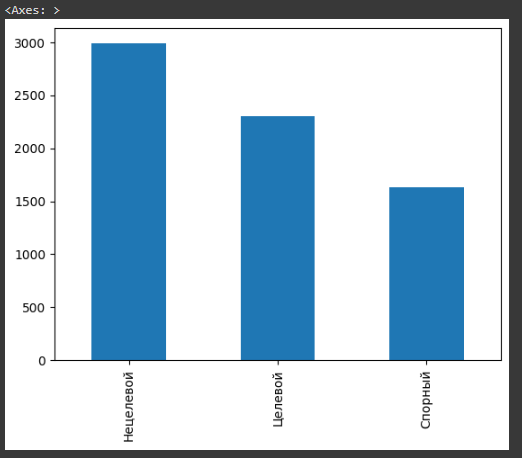

Дообучив эту модель получили метрику f1-score=0.92 и матрицу ошибок

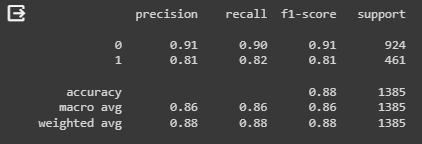

На матрице ошибко заметно, что существую записи которые отмечены(не моделью) неверно в самом ДФ. Данный инцидент был обнаружен неоднократно участниками стажировки. Поэтому эти записи снижают точность модели.

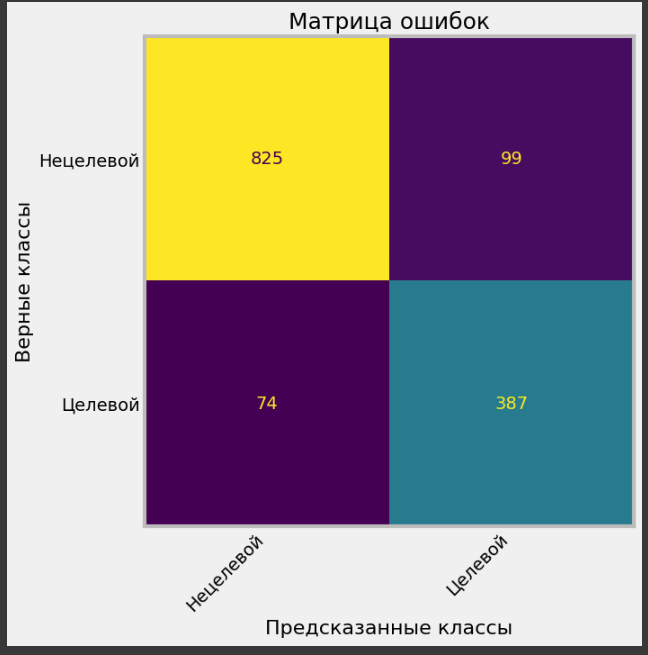

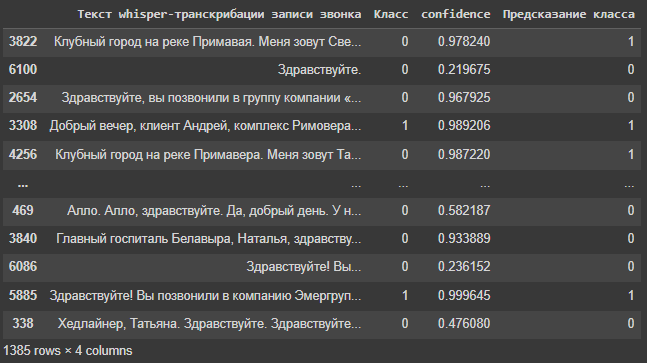

# API

Дл простой реализации API была выбрана библиотека FastAPI. Она позволила реализовать простую клиент-серверную часть.

Единственным недостатком является использование Whisper и BERT для них нужна настроенная машина для работы с pytorch, точнее с CUDA-ядрами.

Настройка по ссылке на ноутбук [CUDA](https://colab.research.google.com/drive/1Z2cahJ8pjN9BD0bptyPv4VlNzmDXY51p?usp=sharing)

Отправляем файл и ждем результата классификации

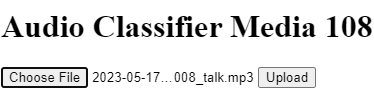

После заугрузки аудио возвращает результат классификации

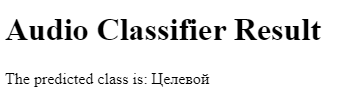

Ссылка на папку в GitHub - [Реализация](https://github.com/terrainternship/Media_108_n/tree/main/Kiryushin%20Artyom/web-API)

Здесь описана вся реализация и небходимые файлы для запуска

# Навыки и библиотеки примененные в этой стажировке

Обработка, анализ и подготовка БД:
*  pandas
*  numpy
*  pickle
*  matplotlib
*  sclearn
*  seaborn
*  plotly
*  NLTK
*  gdown
*  zipfile


ML и AI:
*  tensorflow
*  keras
*  pytorch
*  fast.ai
*  autokeras
*  kerastuner

Аудио:
*  librosa


Транскрибация:
*  BERT
*  Vosk
*  Speech_recognition
*  Nemo

WEB-API:
*  flask
*  fastAPI

Языки:
*  Python
*  HTML
*  CUDA C

Дополнительно:
*  CUDA
*  DistilBERT
*  theano
*  BentoML
